In [1]:
#Import all the modules

import urllib
import json
import requests
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import requests
import shutil
import sys
sys.path.append("../../clint/scripts/")
import clint
import pickle


In [10]:
####################################################

"""
    Queries terms are here
"""

#Location query
voxel_list = {'x':'2', 'y':'4', 'z':'5'}

#Terms query
url ='http://neurosynth.org/api/v2/'
# The url2 link is a link to be used in Neuro image decoder
url2 = {'url':'https%3A%2F%2Fneurovault.org%2Fmedia%2Fimages%2F2531%2Fphon_diff_fwe.nii.gz'}
#This makes it url safe and avoids the % addition from python
urls = "&".join("%s=%s" % (k,v) for k,v in url2.items())

# Image query
url_image = "http://neurosynth.org/images/"

terms_tobequeried = {'search':'broca'} # can be a list of strings

################################

In [18]:
################################
"""
    Test queries are here
"""

#Test data set (1 location) with function call to get_neurosynth
#url2 = https://neurovault.org/media/images/2531/phon_diff_fwe.nii.gz
#data_new = get_neurosynth(url, 'locations', voxel_list)

# Given images, find the terms
#print(urls)
image_decode = clint.get_neurosynth(url,'decode', urls).decode("utf-8")

# Output from image decoder function within Neurosynth
#print(image_decode)


# Given terms, find images
term_decode = clint.get_neurosynth(url,'images', terms_tobequeried) 
#print(term_decode)

url_image = "http://neurosynth.org/images/"


#Importing the image that was queried from an example term
#image is stored in a file called 601, which is the image id

#clint.get_image_from_term(url, terms_tobequeried)


################################

In [20]:
################################

"""
    Text file with all the parsed terms 
"""

#my_dict = clint.parse_decoder_output(image_decode)
#print(my_dict)
#cors = np.array(list(my_dict.values()))

#plt.hist(cors, 50)
#plt.show()


################################

'\n    Text file with all the parsed terms \n'

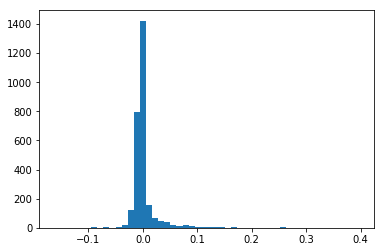

In [8]:
################################
"""
    Plots are here
"""

cors = np.array(list(my_dict.values()))
plt.hist(cors, 50)
plt.show()

################################

In [1]:
import sys
sys.path.append("../../clint/scripts/")
import clint

In [22]:
from nilearn import image as nli
from nilearn import plotting as nlp
%matplotlib inline

/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/miniconda3/envs

In [5]:
test_img = nli.load_img('/home/ubuntu/Ben/clint/scripts/601.nii.gz')

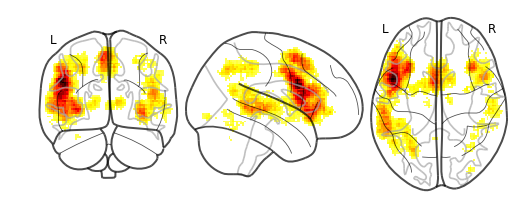

In [6]:
nlp.plot_glass_brain(test_img)

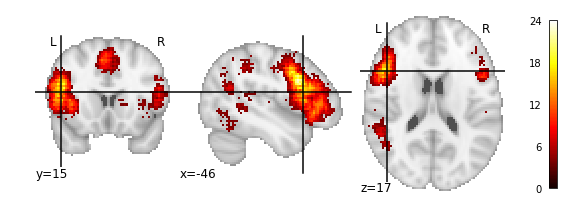

In [7]:
nlp.plot_stat_map(test_img)

In [18]:
with open('/home/ubuntu/zehai/clint/notebooks/patient_symptoms_withID', 'rb') as f:
    symptoms = pickle.load(f)


In [3]:

patient = symptoms.iloc[0,:]

In [19]:
symptoms

,person_id,diagnosis,symptom_id_list,neurosynth_keys
0,1928,thyrotoxicosis from ectopic thyroid nodule wit...,"[440977, 42872402, 443597, 137829, 201826, 376...","[[late], [native, sclerosis], [chronic, diseas..."
1,3332,frontal lobe syndrome,"[201072, 433736, 201826, 377091, 319835, 37432...","[[flow, static], [], [], [], [failure, heart],..."
2,4359,malignant neoplasm of parietal lobe,"[319049, 440385, 374022, 193688, 81902, 435141...","[[acute, failure], [], [], [], [disease, tract..."
3,5780,systemic inflammatory response syndrome,"[444406, 438624, 40480602, 441829, 42872402, 4...","[[acute], [], [acute, chronic, failure, heart]..."
4,6591,frontal lobe syndrome,"[444406, 132797, 42872402, 4112183, 318800, 38...","[[acute], [], [native, sclerosis], [disorder],..."
5,6591,dementia of frontal lobe type,"[444406, 132797, 42872402, 4112183, 318800, 38...","[[acute], [], [native, sclerosis], [disorder],..."
6,7117,malignant neoplasm of parietal lobe,"[200051, 199752, 196925, 40492474, 136184, 200...","[[primary], [secondary], [secondary, tone], [l..."
7,7117,frontal lobe syndrome,"[200051, 199752, 196925, 40492474, 136184, 200...","[[primary], [secondary], [secondary, tone], [l..."
8,8607,mesial temporal lobe sclerosis,"[377844, 381549, 27674, 437542, 435262, 317898...","[[status], [], [], [dual, open, residual, stag..."
9,8729,dementia of frontal lobe type,"[4125629, 192581, 192963, 200219, 443792, 3770...","[[], [], [disorder], [pain], [], [], [], [clos..."


In [12]:
url = "http://neurosynth.org/api/v2/"

pt_fwd_imgs = []
pt_rev_imgs = []
for nks in patient.neurosynth_keys:
    for nk in nks:
        fwd, rev = clint.get_image_from_term(url, {'search':nk})
        pt_fwd_imgs.append(fwd)
        pt_rev_imgs.append(rev)

File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in 

KeyboardInterrupt: 

In [6]:
pt_fwd_imgs

[]

In [14]:
import os
os.path.

In [10]:
# Image query

terms_tobequeried = {'search': patient.neurosynth_keys} # can be a list of strings

#term_decode = clint.get_neurosynth(url,'images', terms_tobequeried) 

imgs = clint.get_image_from_term(url, terms_tobequeried)

In [15]:
'/'.join(clint.__file__.split('/')[:-2])

['..', '..', 'clint']

In [17]:
import os
os.mkdir()

In [13]:
def get_label_map():
    levels = ['region', 'hemisphere_region', 'lobe', 'gyrus', 'tissue', 'sub-label']
    label_map = {}
    for level in levels:
        with open ('../data/%s_label_map.pkz'%level, 'rb') as h:
            label_map.update(pickle.load( h))
    return label_map

In [14]:
label_map = get_label_map()

In [23]:
sample_nifti_path = '../data/Talairach-labels-2mm.nii.gz'
sample_nifti = nli.load_img(sample_nifti_path)

In [25]:
region_nii = nli.new_img_like(sample_nifti, label_map['Frontal Lobe'], sample_nifti.affine, copy_header=True)

In [26]:
region_nii.to_filename('../data/tmp/decode_test.nii.gz')